# Exercise 2: Analysis of spontaneous activity 
version • 19May2022

Goal: Load and extract data from Spike2. Get spiketimes using a simple threshold. Analyze spontaneous activity.

## Experiment
The individual *Apteronotus* will be paralyzed by intramuscular curare injection. Curare blocks the neuromuscular junction, but since the electric organ is composed of modified axons in *Apteronotus*, its electric field is largely unaffected by the drug. The fish will be motionless, but will nevertheless be able to perform complex electrogenic behaviors.
Importantly, the fish will not be able to use its gills to respire, and therefore artificial respiration is necessary. Respiration is achieved by directing a flow of water into the fish’s mouth. Maintaining this flow is critical for the survival of the animal and for the success of the experiment. As much as we don’t like water in our lungs, these fish **DON’T** like air in their gills. If you see an air bubble, inform one of us immediately.
We will continuously monitor the electric field of the fish on the oscilloscope - a sinusoidal-like waveform. This is the animal’s electric organ discharge (EOD), which is useful for monitoring the health of the fish and its behavior. Turn on the audio monitor to hear it - it should sound like a pure tone. 
Indeed, these animals expend a considerable fraction of their metabolic budget producing this field: it is indeed a  good indicator of the overall health of the animal. 

**IT IS VERY IMPORTANT FOR YOU TO MONITOR THE EOD AMPLITUDE: IMMEDIATELY INFORM ONE OF US IF YOU SEE ANY SUDDEN DECREASE IN EOD AMPLITUDE.**

NOTE: Fish are cold-blooded vertebrates; this means that their metabolic activity decreases with temperature and this includes the generation of their EOD. 
We use a recirculating flow of water - it is pumped from a bucket with a heater and a bubbler to the main tank. Overflow from the tank returns to the bucket. It’s important not to have the flow rate too high or too slow. 

## Recordings
Pull  micropipettes using the Sutter puller and fill them with 3M KCl.
Place the micropipette in the holder at the tip of the micropositioner. The electrode should be approximately vertical.
Use the positioner to lower the electrode so that the tip is in the saline.
Use the motor control to lower the electrode until you hit the surface of the brain
Zero the depth monitor and begin to slowly lower the electrode in steps of 2 μm: don’t forget to buzz every once in a while. You should start seeing receptor afferents at about 900 μm (depending on where the electrode penetrated). Be patient, if you go too fast, the recordings will not be as stable.
Receptor afferents have high firing rates (150-500 spikes/sec) and are spontaneously active: make sure the signal-to-noise ratio (SNR) is large enough to trigger spikes reliably. Ask one of us if you’re not sure. Try recording baseline activity from a few units (50 seconds will be plenty). You should find plenty of receptors but holding the recording for more than 1-2 minutes is tough. Try buzzing again if the SNR gets too low, or try going up or down one step and buzzing again. 

# Exercise 3: Responses of central neurons

## Recordings
Depending on site, the summed activity of PCells should be registered on the recording electrode from about 500 μm on. PCells have low firing rates (5-50 spikes/sec), will typically show phase-locking to the search stimulus, and are also spontaneously active [make sure the signal-to-noise ratio is large enough to trigger spikes reliably for analysis]. To record from PCells:
For central neurons, we may use pairs of Wood's metal electrodes  
Use the motor control to slower lower the electrodes until you reach the surface of the brain
Zero the depth monitor
Gently lower the electrodes into the brain wile stimulating the animal with a global 4 Hz AM "search stimulus". Be patient, if the electrode is advanced too quickly, the tissue will be damaged and any recordings established will be less stable.
Try recording baseline activity from a few PCell untis - about 1 minute each. If you used the search stimulus, be sure to let the activity recover (~ 1 min no stimulation) before recording baseline activity. 
NOTE: Remember to rinse the craniotomy with saline frequently between recordings!


## Stimulation
Once you have a stable recording, use deliver stimuli to the animal. The fish's EOD acts like a carrier signal - our stimuli are amplitude (and sometimes phase) modulations of the EOD. The relevant stimulus to the fish are the AMs. The fish has separate neural pathways for processing amplitude and phase modulations of the EOD: here we will be studying the pathway that codes for amplitude modulations exclusively. 
Stimulation can be applied through the buttons in the stimulation panel in Spike2. 
Try recording PCell responses to sinusoidal AMs at 1, 2, 4, 8, 16, 32, 64, 128, 256 Hz. Each stimulus should be applied for at least 15-20 seconds. 
Stimulation with random amplitude modulations (RAM). For this we prepared noise in the range of 0-120 Hz. 
See how PCells respond to contrast modulated SAMs (this simulates what a fish might experience during an agonistic or courtship encounter). These are “envelopes” of the AM of the EOD (i.e., an amplitude modulation of the amplitude modulation) with different carrier frequencies (AM bandwidths)
Adjust the stimulus intensity by varying the amplitude on the sine wave generator. A modulation depth of 15% is a typical stimulus contrast used in most studies.

## A) Basic Analysis of Neurophysiological data

### Pre-analysis for responses to central neurons
The afferent recordings are intracellular, and so we almost always record from a single unit. However, our other recordings are extracelullar, and therefore we may record from more than one neuron at a time. In those cases, we will use Spike2 to identify the individual neurons. There are tools in Spike2 that will group spikes belonging to individual PCells based on some spike characteristics (i.e., shape, amplitude, width,…). If you use Spike 2 to identify spikes, then we do not need to do the step "Extract spike times" below. Rather, we will use this command:
spiketimes = ChX.times; where X is the appropriate channel exported from Spike2.

### Load data 
This function opens your ".mat" exported from Spike2 and stores data from each channel into its own vector. In addition to the sampled data, the time vector for the stimulus channel is generated.

In [1]:
import numpy as np
from dataclasses import dataclass

@dataclass
class Data:
    vm: np.array
    am: np.array
    eod: np.array
    eod_times : np.array
    fs: float
    dp: np.array
    dpfs: float
    comment_times: np.array

    @property
    def time(self):
        return np.arange(len(self.vm)) / self.fs
    @property
    def dipole_time(self):
        return np.arange(len(self.vm)) / self.fs

def load_data(filename):
    from scipy.io import loadmat
    data = loadmat(filename, squeeze_me=True, simplify_cells=True)
    eod = data["Ch1"]["values"]
    eod_times = data["Ch2"]["times"]
    vm = data["Ch5"]["values"]
    am = data["Ch3"]["values"]
    fs = 1./data["Ch5"]["interval"]
    dp = data["Ch6"]["values"]
    dpfs = data["Ch6"]["interval"]
    ct = data["Ch31"]["times"]
    d = Data(vm, am, eod, eod_times, fs, dp, dpfs, ct)
    return d



(0.0, 0.5)

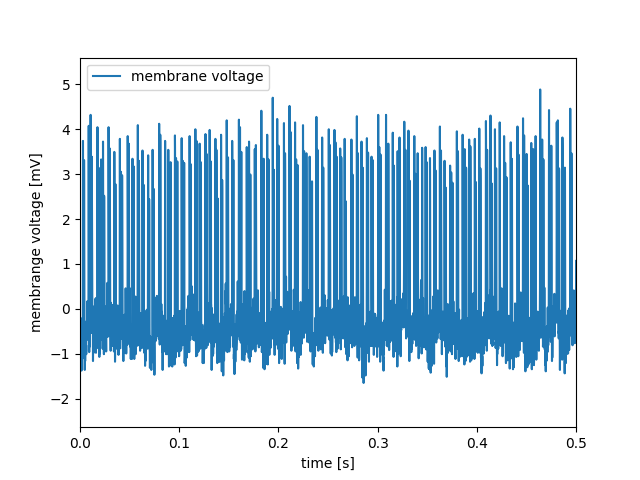

In [72]:
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter
%matplotlib widget

filename = "data/pUNITsv6.mat"
data = load_data(filename)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data.time, data.vm, label="membrane voltage")
ax.set_xlabel("time [s]")
ax.set_ylabel("membrange voltage [mV]")
ax.legend()
ax.set_xlim(0, 0.5)

### Extract spike times from the membrane potential • Step 1: Filter
NOTE: If you extract the spike times before you export from Spike2, you do not need to run this section of code and should skip to the characterization of baseline activity. 
You’ve probably noticed that the membrane potential fluctuates a bit during the recordings. We can reduce this problem by high-pass filtering the trace. We compare the filtered and unfiltered traces below.

(0.0, 0.5)

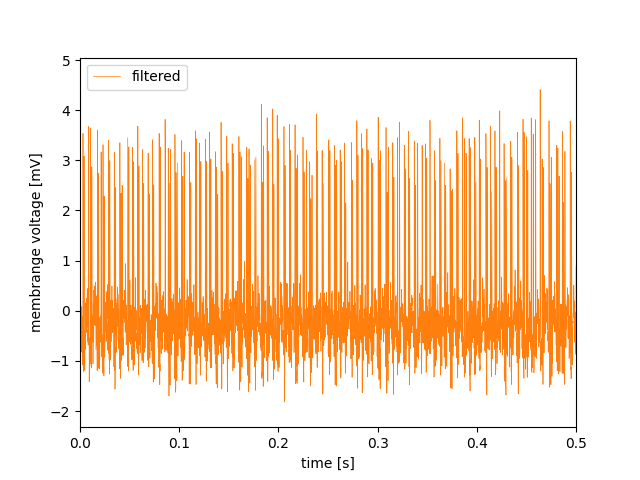

Clicked coordinates (0.0040322580645161255, 1.8296350449488137)


In [88]:
coords = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    global coords
    coords.append((ix, iy))
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
    print(f"Clicked coordinates {(ix, iy)}")
    return coords


# hig-pass filter to remove slow membrane potential changes.
b, a = butter(2, 200, 'high', fs=data.fs)
vm_filtered = filtfilt(b, a, data.vm);

fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
ax = fig.add_subplot(111)
ax.plot(data.time, vm_filtered, lw=0.5, label="filtered", color="tab:orange")
ax.set_xlabel("time [s]")
ax.set_ylabel("membrange voltage [mV]")
ax.legend()


ax.set_xlim(0, 0.5)

<bound method Axes.legend of <Axes: >>

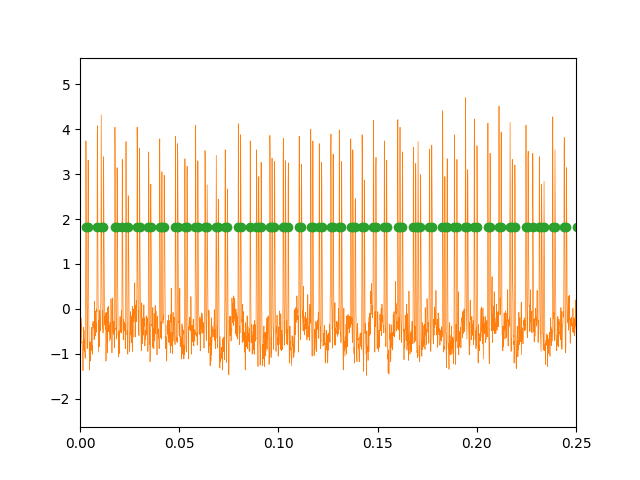

In [89]:
from util import threshold_crossing

threshold = coords[-1][-1]
spike_times, _ = threshold_crossing(vm_filtered, data.time, threshold)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data.time, data.vm, lw=0.5, color="tab:orange", label="filtered data", zorder=0)
ax.scatter(spike_times, np.ones_like(spike_times) * threshold, c="tab:green", label="spikes", 
           zorder=1)
ax.set_xlim(0., 0.25)
ax.legend

### Characterize baseline activity
Now that you have the spike times (either from the above code or from Spike2), you can characterize the baseline activity of these receptors (i.e., the spiking activity without stimulation). To do this we 1) calculate the mean baseline firing rate, 2) determine the interspike interval, 3) compute the coeffiecient of variation, 4) plot the phase distribution relative to the EOD, and 5) measure the degree of phase locking of the spike times releative to the EOD.

#### 1. Baseline activity - no stimulus

In [75]:
# Take data before the first stimulus starts - marker(1) - or first 20
# seconds
baseline_duration = min([data.comment_times[0], 20.]);
baseline_spikes = spike_times[spike_times < baseline_duration]
baserate = len(baseline_spikes) / baseline_duration
print(f"Baseline firing rate: {len(baseline_spikes)/baseline_duration:.2f} Hz")
isi = np.diff(baseline_spikes)

std_isi = np.std(isi);
mean_isi = np.mean(isi);
cv = std_isi/mean_isi
print(f"Coefficient of variation of the interspike-intervals: {cv:.2}")

Baseline firing rate: 376.71 Hz
Coefficient of variation of the interspike-intervals: 0.62


#### 2. Plot baseline interspike interval distribution (ISI Histogram) 
The temporal patterning of spikes, e.g. regular firing versus bursty, can be revealed in an ISI Histogram.
The histogram is sensitive to the firing rate of the neuron - if a neuron is firing around 100 Hz, the mean ISI will be around 10ms. Another neuron might fire at around 10Hz, and so its mean ISI will be around 100ms.  This is important in this visualization as you will need to adjust the ISIrange below to capture the patterns related to the neuron you are analyzing.

Text(0.5, 0, 'interspike interval [s]')

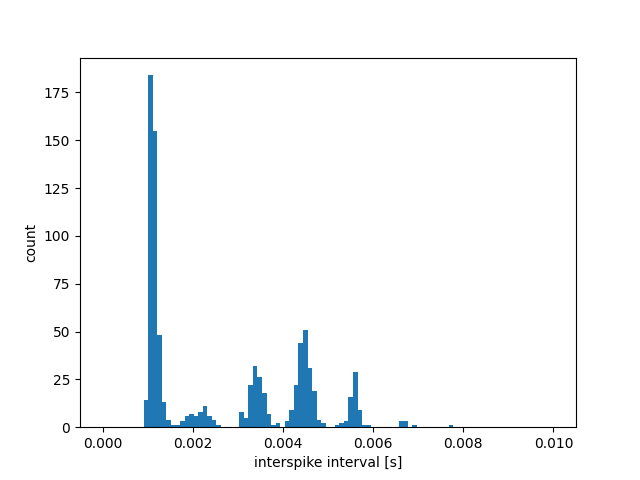

In [77]:
# Make a histogram of ISIs - we need bins over the range of ISI durations
# CHOOSE WISELY! This will vary between neurons.
# For phase locking afferents, [0, 0.010] is useful
# For bursty neurons in the torus, [0, 2.000]
isi_range = [0.000, 0.010]

# Create 100 bins evenly distributed between the min and max of isi
bins = np.linspace(*isi_range, 100)
h, edges = np.histogram(isi, bins=bins)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(bins[:-1] + np.diff(bins)/2, h, width=np.diff(bins)[0])
ax.set_ylabel("count")
ax.set_xlabel("interspike interval [s]")

#### 3. Plot phase of spiking relative to the EOD (baseline)
You might have noticed that receptor afferents tend to fire near a local maximum of the EOD. What about the pyramidal cells in the ELL or neurons in the torus? 
Here we evaluate the phase relationship between the spike train and the EOD. To do this, you’ll need to convert the spike times into phases with respect to the nearest EOD zero crossing.

/tmp/ipykernel_11784/2575330806.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",


Text(0.5, 0, 'Spike phase [rad]')

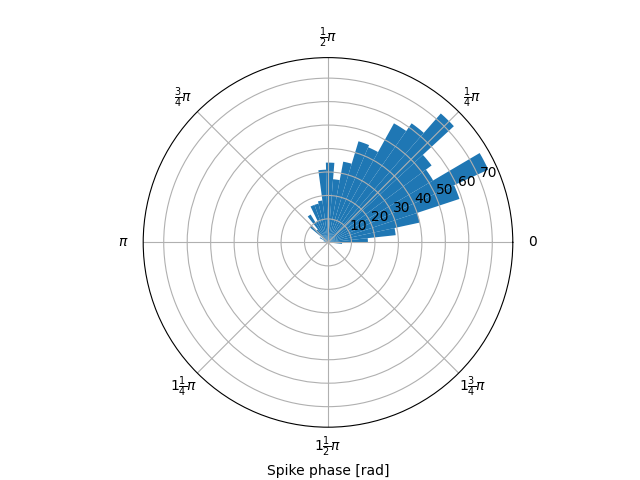

In [78]:
# Compute a phase histogram relative to the EOD. 
# Select the spike times between the 1st and last EOD zero-crossings of our
# sample before the first stimulus occurred - almost all spikes if not all!

baseline_eodtimes = data.eod_times[data.eod_times <= baseline_duration]
indices = np.searchsorted(baseline_eodtimes, baseline_spikes)
starts = baseline_eodtimes[indices-1]
ends = baseline_eodtimes[indices]

delays_abs = baseline_spikes - starts
delays_rel = delays_abs / (ends - starts)
phases = delays_rel * 2 * np.pi

# Plot phase distribution
numbins = 60  # Number of bins for the histogram (60 is default)
bins = np.linspace(0, 2 * np.pi, numbins)
h, n = np.histogram(phases, bins)

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
ax.bar(bins[:-1] + np.diff(bins)/2, h, width=np.diff(bins)[0])
ax.set_xticklabels(["0", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",
                    r"$\frac{3}{4}\pi$", "$\pi$", r"1$\frac{1}{4}\pi$",
                    r"1$\frac{1}{2}\pi$", r"$1\frac{3}{4}\pi$"])
ax.set_xlabel("Spike phase [rad]")

#### 4. Measure degree of phase locking (vector strength) to EOD
Vector strength is used as a measure of phase locking (commonly used for analysis of the auditory system) and ranges between zero and one.

In [79]:
# Compute the vector strength (VS)
vector_strength = np.sqrt(np.mean(np.cos(phases))**2 + np.mean(np.sin(phases))**2)
print(f"Vector strength: {vector_strength:.2f}")

Vector strength: 0.84
